**支持向量机的优化问题**

支持向量机的目标函数优化等价于对如下拉格朗日对偶函数的优化

$$
\max_a\ W(\alpha)=\sum_{i=1}^N\alpha_i-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^Ny^{(i)}y^{(j)}\alpha_i\alpha_j\langle x^{(i)}, x^{(j)} \rangle
$$

subject to:

$$
\sum_{i=1}^N \alpha_i y_i = 0 \\
0 \leq \alpha_i \leq C;\ i=1, 2, \cdots, N
$$

其中

- $N$是训练集的数量
- $x^{(i)}$是第$i$个训练特征向量
- $\alpha_i\alpha_j\langle x^{(i)}, x^{(j)} \rangle$是 $x^{(i)}$ 和 $x^{(j)}$的内积，结果是标量
- $y^{(i)}$是第$i$个训练样例的输出
- $\alpha_i$是第$i$个训练样例的拉格朗日算子
- $C$是正则化参数，$C$越大错误分类时的cost越大，正则化越弱，即对错误分类的容忍越小，超平面的间隔越小。
- 使用核函数$\mathbf K(x, z)$时，用$\langle \phi(x^{(I)}, \phi(x^{(j)} \rangle$代替$\langle x^{(i)}, x^{(j)} \rangle$，其中特征映射函数是$\phi(x)$

我们知道
$$
\mathbf w=\sum_{i=1}^N\alpha_iy^{(i)}\mathbf x^{(n)}
$$

所以SVM的决策函数为

$$
    f(\mathbf x)=sign(\mathbf {w^*}^T \mathbf x+b^*)=sign\left(\sum_{i=1}^N\alpha_iy^{(i)}\langle \mathbf x^{(i)}, \mathbf x_{test} \rangle + b\right)
$$

决策函数只依赖于$\alpha_i=0$的样本点，即支持向量。

**核函数**

Kernel function defines inner product in the transformed space.

对于线性不可分的训练数据，可以将特征$\mathbf x$映射到高维空间$\phi(\mathbf x)$，然后再高维空间中找到超平面进行分割。

此时对偶函数变为：

$$
\max_a\ W(\alpha)=\sum_{i=1}^N\alpha_i-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^Ny^{(i)}y^{(j)}\alpha_i\alpha_j\langle \phi(x^{(i)}), \phi(x^{(j))} \rangle
$$

如果我们定义函数$K$为

$$
K(x^{(i)},x^{(j)}) = \langle \phi(x^{(i)}), \phi(x^{(j))} \rangle
$$

因为$K(x^{(i)},x^{(j)}）$是向量内积，所以在计算对偶函数的时候只需要知道函数$K$的值，而不需要知道$\phi(x)$的具体形式，从而避免在高维处理数据，这就是**Kernel Trick**




**SMO算法**

坐标上升法(Coordinate Ascent)每次通过更新函数中的一维，通过多次的迭代以达到优化函数的目的。

由于目标函数为凸函数，一般的优化算法都通过梯度方法一次优化一个变量求解二次规划问题的最大值，但是，对于以上问题，由于限制条件 ${\displaystyle \sum _{i=1}^{n}y_{i}\alpha _{i}=0}$存在，当某个 ${\displaystyle \alpha _{i}\,}$从 ${\displaystyle \alpha _{i}^{old}} $更新到 ${\displaystyle \alpha _{i}^{new}} $时，上述限制条件即被打破。为了克服以上的困难，SMO采用一次更新两个变量的方法。

**数学推导**

不失一般性(Without loss of generality)，我们假设选取$\alpha_1, \alpha_2$进行优化，其他$\alpha_i, i\notin {1,2}$不变。因为$\sum_{i=1}^N\alpha_iy_i=0$，所以$y_1\alpha_1^{(old)}+y_2\alpha_2^{(old)}=constant=y_1\alpha_1^{(new)}+y_2\alpha_2^{(new)}$，即$\alpha_1, \alpha_2$在一条直线上。

(-0.2, 1.2, -0.2, 1.2)

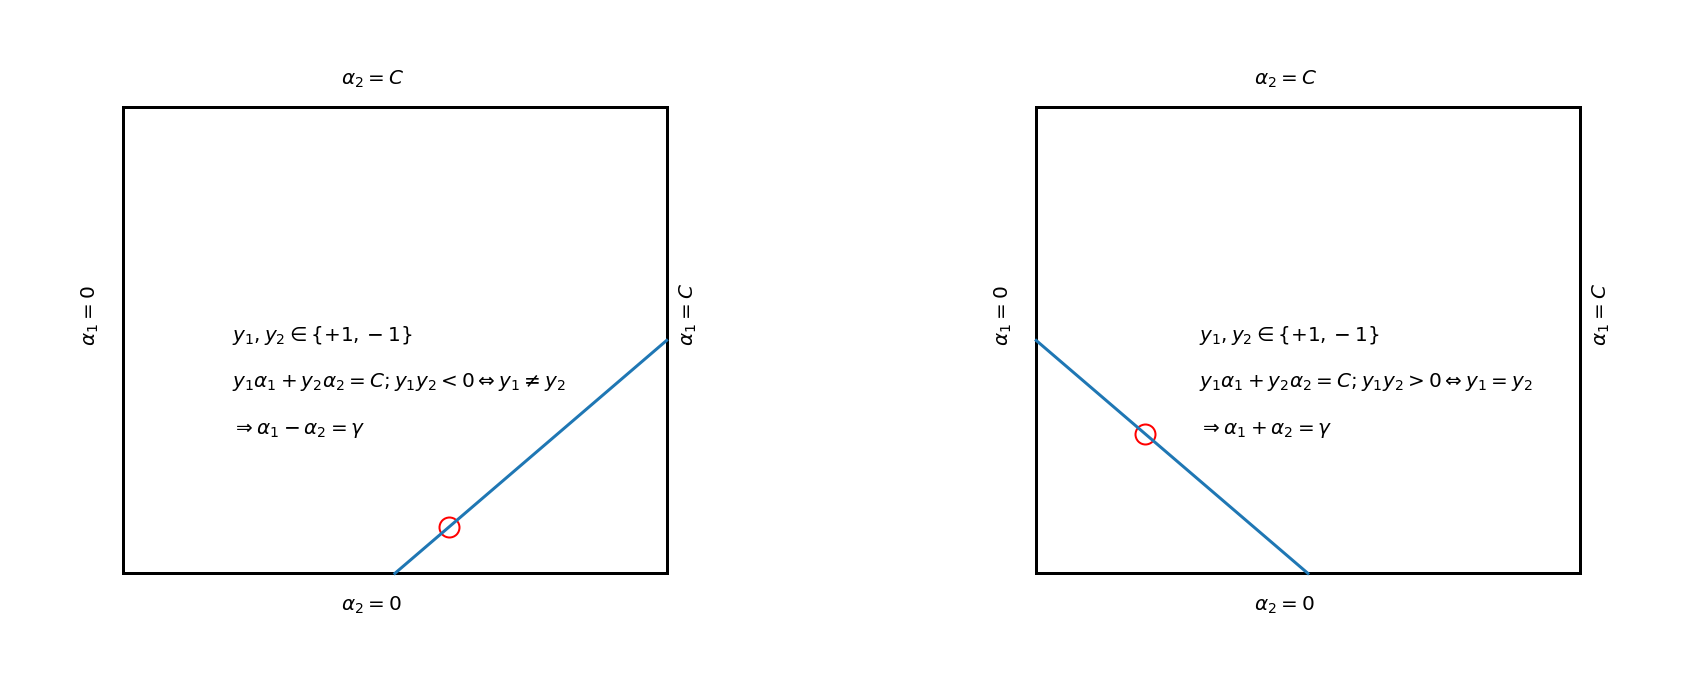

In [94]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# This line is only needed if you have a HiDPI display
%config InlineBackend.figure_format = 'retina'

C = 1
f = plt.figure(figsize=(15,6))
ax = plt.subplot(121)
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.plot([0, 1], [0, 0], c='k')
ax.plot([0, 1], [1, 1], c='k')
ax.plot([0, 0], [0, 1], c='k')
ax.plot([1, 1], [0, 1], c='k')
ax.text(0.4, 1.05, r'$\alpha_2=C$')
ax.text(-0.08, 0.5, r'$\alpha_1=0$', rotation='vertical')
ax.text(1.02, 0.5, r'$\alpha_1=C$', rotation='vertical')
ax.text(0.4, -0.08, r'$\alpha_2=0$')
ax.plot([0.5, 1], [0, 0.5])
ax.scatter(0.6, 0.1, marker='o', facecolor='w', cmap=plt.cm.viridis, s=100, linewidth=1, edgecolors='r')
ax.text(0.2, 0.5, r'$y_1, y_2 \in \{+1, -1\}$')
ax.text(0.2, 0.4, r'$y_1\alpha_1+y_2\alpha_2=C; y_1y_2 < 0 \Leftrightarrow y_1 \neq y_2$')
ax.text(0.2, 0.3, r'$\Rightarrow \alpha_1-\alpha_2=\gamma$')
ax.axis('off')

ax = plt.subplot(122)
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.plot([0, 1], [0, 0], c='k')
ax.plot([0, 1], [1, 1], c='k')
ax.plot([0, 0], [0, 1], c='k')
ax.plot([1, 1], [0, 1], c='k')
ax.text(0.4, 1.05, r'$\alpha_2=C$')
ax.text(-0.08, 0.5, r'$\alpha_1=0$', rotation='vertical')
ax.text(1.02, 0.5, r'$\alpha_1=C$', rotation='vertical')
ax.text(0.4, -0.08, r'$\alpha_2=0$')
ax.plot([0.0, 0.5], [0.5, 0])
ax.scatter(0.2, 0.3, marker='o', facecolor='w', cmap=plt.cm.viridis, s=100, linewidth=1, edgecolors='r')
ax.text(0.3, 0.5, r'$y_1, y_2 \in \{+1, -1\}$')
ax.text(0.3, 0.4, r'$y_1\alpha_1+y_2\alpha_2=C; y_1y_2 > 0 \Leftrightarrow y_1 = y_2$')
ax.text(0.3, 0.3, r'$\Rightarrow \alpha_1+\alpha_2=\gamma$')
ax.axis('off')

不失一般性，可以先计算$\alpha_2^{(new)}$，然后根据它计算$\alpha_1^{(new)}$。

根据$0 \leq \alpha_1, \alpha_2 \leq C$和$y_1\alpha_1^{(old)}+y_2\alpha_2^{(old)}=constant=y_1\alpha_1^{(new)}+y_2\alpha_2^{(new)}$，即$\alpha_1, \alpha_2$可以得出$\alpha_2{new}$更严格的限制条件：

$$
U \leq \alpha_2{(new)} \leq V
$$

其中$U,V$的定义如下:

- 如果$y_1 \neq y_2$，对应于上面左图

$$
\begin{cases}
U = \max\{0, \alpha_2^{(old)}-\alpha_1^{(old)}\},\\
V = \min\{C, C-\alpha_1^{(old)}+\alpha_2^{(old)}\}
\end{cases}
$$

- 如果$y_1=y_2$，对应于上面右图

$$
\begin{cases}
U = \max\{0, \alpha_1^{(old)}+\alpha_2^{(old)}-C\},\\
V = \min\{C, \alpha_1^{(old)}+\alpha_2^{(old)}\}
\end{cases}
$$

下面是关于$U,V$的具体讨论

- 如果$y_1 \neq y_2$， 有$\alpha_1-\alpha_2=\gamma$

    + 如果$\gamma \gt 0$，有$0\leq\alpha_2\leq C-\gamma=C-\alpha_1+\alpha_2$，如下面左图
    
    + 如果$\gamma \lt 0$，有$\alpha_2-\alpha_1=-\gamma \leq \alpha_2 \leq C$，如下面右图
    
    两个式子综合得到：
    
    $$
    \begin{cases}
    U = \max\{0, \alpha_2^{(old)}-\alpha_1^{(old)}\},\\
    V = \min\{C, C-\alpha_1^{(old)}+\alpha_2^{(old)}\}
    \end{cases}
    $$

(-0.2, 1.2, -0.2, 1.2)

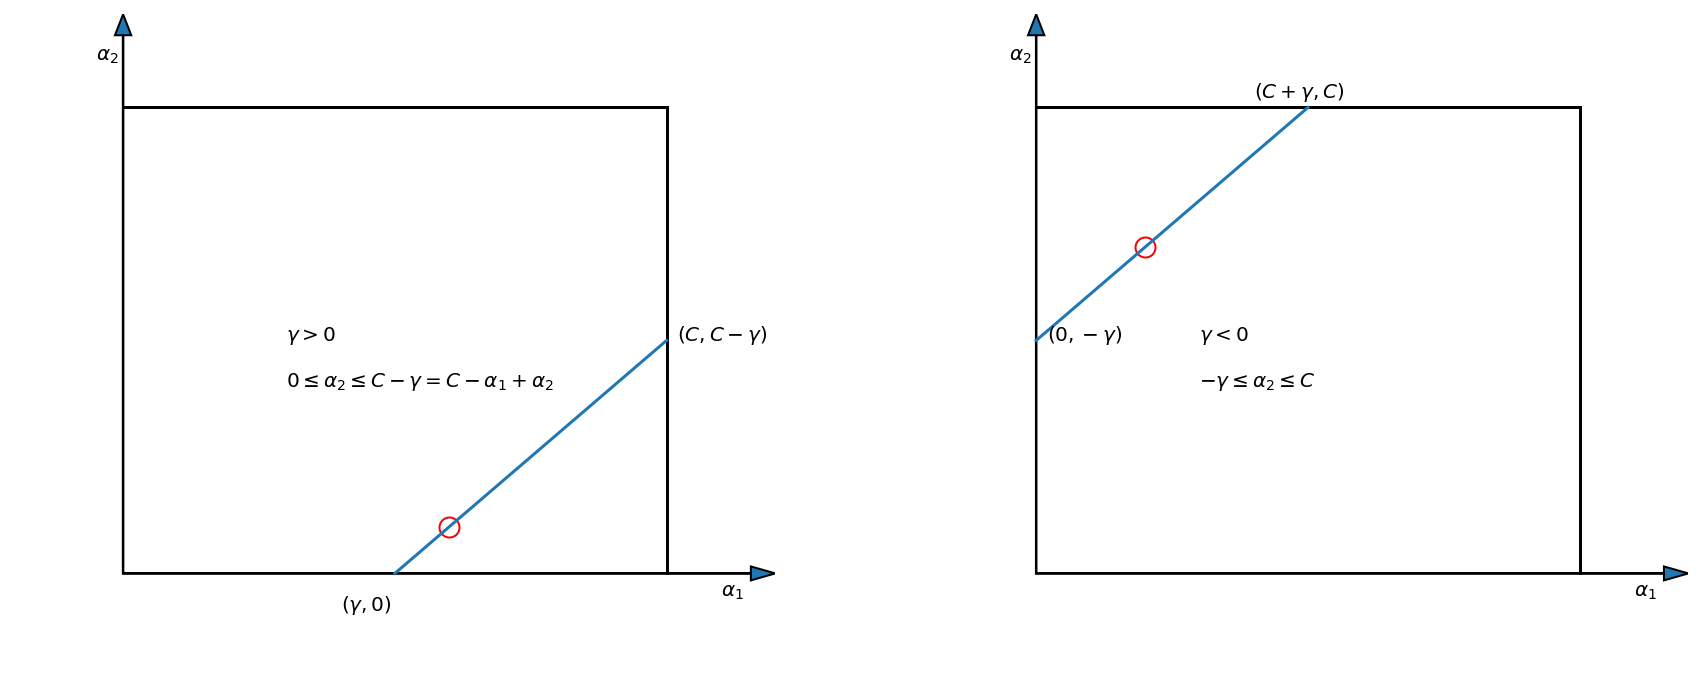

In [95]:
f = plt.figure(figsize=(15,6))
ax = plt.subplot(121)
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.arrow(0, 0, 1.2, 0, length_includes_head = True, head_width = 0.03)
ax.arrow(0, 0, 0, 1.2, length_includes_head = True, head_width = 0.03)
ax.plot([0, 1], [1, 1], c='k')
ax.plot([1, 1], [0, 1], c='k')
ax.text(-0.05, 1.1, r'$\alpha_2$')
ax.text(1.1, -0.05, r'$\alpha_1$')
ax.text(1.02, 0.5, r'$(C, C-\gamma)$')
ax.text(0.4, -0.08, r'$(\gamma, 0)$')
ax.plot([0.5, 1], [0, 0.5])
ax.scatter(0.6, 0.1, marker='o', facecolor='w', cmap=plt.cm.viridis, s=100, linewidth=1, edgecolors='r')
ax.text(0.3, 0.5, r'$\gamma > 0$')
ax.text(0.3, 0.4, r'$0 \leq \alpha_2 \leq C-\gamma=C-\alpha_1+\alpha_2$')

ax.axis('off')

ax = plt.subplot(122)
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.arrow(0, 0, 1.2, 0, length_includes_head = True, head_width = 0.03)
ax.arrow(0, 0, 0, 1.2, length_includes_head = True, head_width = 0.03)
ax.plot([0, 1], [1, 1], c='k')
ax.plot([1, 1], [0, 1], c='k')
ax.text(-0.05, 1.1, r'$\alpha_2$')
ax.text(1.1, -0.05, r'$\alpha_1$')
ax.text(0.02, 0.5, r'$(0, -\gamma)$')
ax.text(0.4, 1.02, r'$(C+\gamma, C)$')
ax.plot([0, 0.5], [0.5, 1])
ax.scatter(0.2, 0.7, marker='o', facecolor='w', cmap=plt.cm.viridis, s=100, linewidth=1, edgecolors='r')
ax.text(0.3, 0.5, r'$\gamma < 0$')
ax.text(0.3, 0.4, r'$-\gamma \leq \alpha_2 \leq C$')
ax.axis('off')

- 如果$y_1 = y_2$， 有$\alpha_1+\alpha_2=\gamma$

    + 如果$\gamma \gt C$，有$\gamma-C \leq \alpha_2 \leq C$，如下面左图
    
    + 如果$\gamma \lt C$，有$0 \leq \alpha_2 \leq \gamma $，如下面右图
    
    两个式子综合得到：
    
    $$
    \begin{cases}
    U = \max\{0, \alpha_1^{(old)}+\alpha_2^{(old)}-C\},\\
    V = \min\{C, \alpha_1^{(old)}+\alpha_2^{(old)}\}
    \end{cases}
    $$

(-0.2, 1.2, -0.2, 1.2)

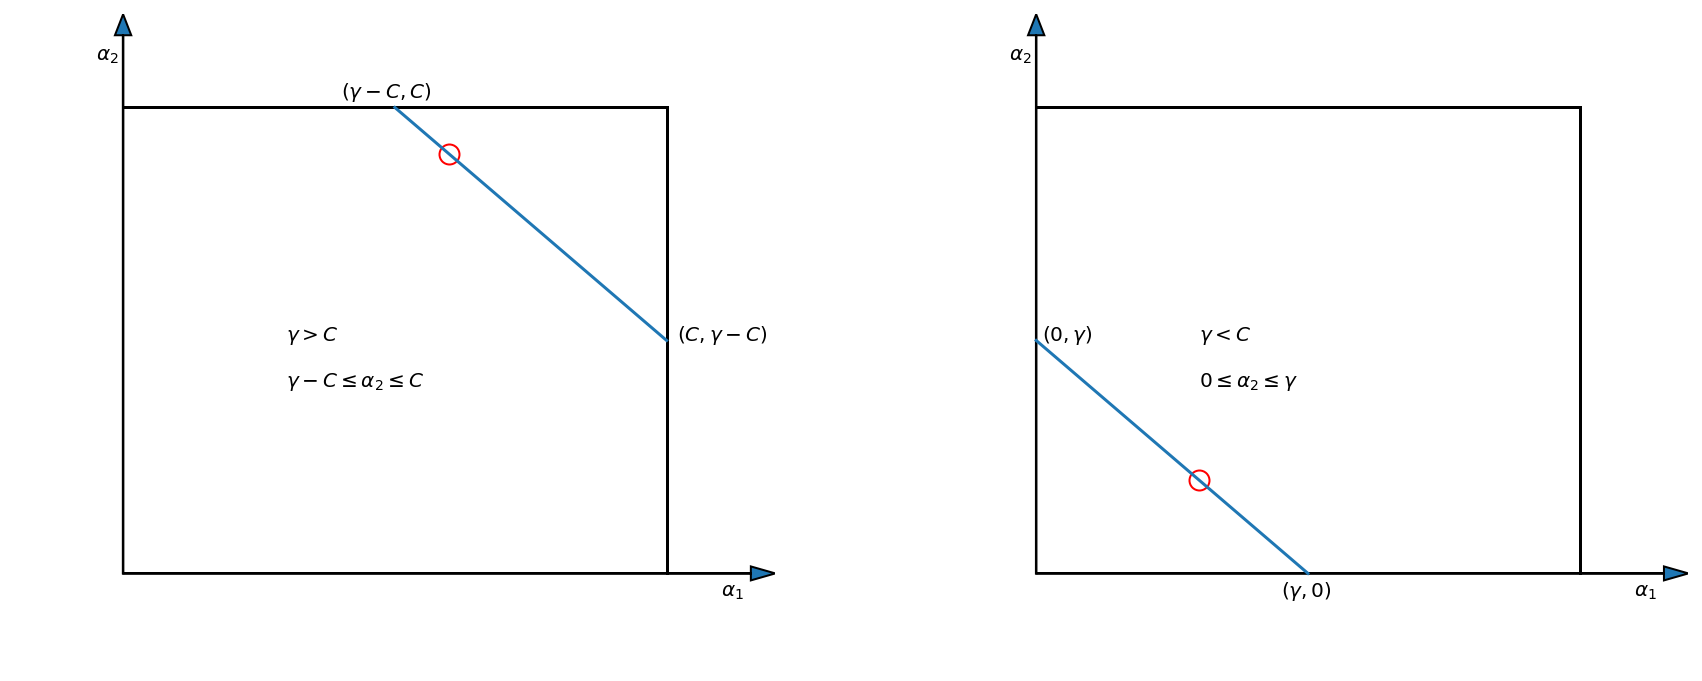

In [96]:
f = plt.figure(figsize=(15,6))
ax = plt.subplot(121)
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.arrow(0, 0, 1.2, 0, length_includes_head = True, head_width = 0.03)
ax.arrow(0, 0, 0, 1.2, length_includes_head = True, head_width = 0.03)
ax.plot([0, 1], [1, 1], c='k')
ax.plot([1, 1], [0, 1], c='k')
ax.text(-0.05, 1.1, r'$\alpha_2$')
ax.text(1.1, -0.05, r'$\alpha_1$')
ax.text(1.02, 0.5, r'$(C, \gamma-C)$')
ax.text(0.4, 1.02, r'$(\gamma-C, C)$')
ax.plot([0.5, 1], [1, 0.5])
ax.scatter(0.6, 0.9, marker='o', facecolor='w', cmap=plt.cm.viridis, s=100, linewidth=1, edgecolors='r')
ax.text(0.3, 0.5, r'$\gamma > C$')
ax.text(0.3, 0.4, r'$\gamma-C \leq \alpha_2 \leq C$')
ax.axis('off')

ax = plt.subplot(122)
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.arrow(0, 0, 1.2, 0, length_includes_head = True, head_width = 0.03)
ax.arrow(0, 0, 0, 1.2, length_includes_head = True, head_width = 0.03)
ax.plot([0, 1], [1, 1], c='k')
ax.plot([1, 1], [0, 1], c='k')
ax.text(-0.05, 1.1, r'$\alpha_2$')
ax.text(1.1, -0.05, r'$\alpha_1$')
ax.text(0.01, 0.5, r'$(0, \gamma)$')
ax.text(0.45, -0.05, r'$(\gamma, 0)$')
ax.plot([0, 0.5], [0.5, 0])
ax.scatter(0.3, 0.2, marker='o', facecolor='w', cmap=plt.cm.viridis, s=100, linewidth=1, edgecolors='r')
ax.text(0.3, 0.5, r'$\gamma < C$')
ax.text(0.3, 0.4, r'$0 \leq \alpha_2 \leq \gamma$')
ax.axis('off')

要优化

$$
\max_a\ W(\alpha)=\sum_{i=1}^N\alpha_i-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j K(x_i, x_j)
$$

subject to

$$
\sum_{i=1}^N\alpha_iy_i=0 \\
0 \leq \alpha_i \leq C, i=1, 2, \cdots, N
$$




假设算法在某次更新时更新的变量为 ${\displaystyle \alpha _{1}\,}$和 ${\displaystyle \alpha _{2}\,}$，则其余变量都可以视为常量。为了描述方便，规定

$$
{\displaystyle K_{ij}=K(\mathbf {x_{i}} ,\mathbf {x_{j}} ) \\
f(\mathbf {x_{i}} )=\sum _{j=1}^{n}y_{j}\alpha _{j}K_{ij}+b,} \\
{\displaystyle v_{i}=f(\mathbf {x_{i}} )-\sum _{j=1}^{2}y_{j}\alpha _{j}K_{ij}-b} 
$$

因而，二次规划目标值可以写成

$$
{\displaystyle {\begin{array}{lcl}W(\alpha _{1},\alpha _{2})&=&\sum _{i=1}^{n}\alpha _{i}-{\frac {1}{2}}\sum _{i=1}^{n}\sum _{j=1}^{n}y_{i}y_{j}K(x_{i},x_{j})\alpha _{i}\alpha _{j}\\&=&\alpha _{1}+\alpha _{2}-{\frac {1}{2}}K_{11}\alpha _{1}^{2}-{\frac {1}{2}}K_{22}\alpha _{2}^{2}-y_{1}y_{2}K_{12}\alpha _{1}\alpha _{2}\\&&-y_{1}\alpha _{1}v_{1}-y_{2}\alpha _{2}v_{2}+{\text{constant}}\,\end{array}}}
$$

由于限制条件 ${\displaystyle \sum _{i=1}^{n}y_{i}\alpha _{i}=0}$ 存在，将 ${\displaystyle \alpha _{3},\ldots ,\alpha _{n},y_{3},\ldots ,y_{n}}$ 看作常数，则有 ${\displaystyle \alpha _{1}y_{1}+\alpha _{2}y_{2}=C\,}$成立（ ${\displaystyle C\,}$为常数）。由于 ${\displaystyle y_{i}\in \{-1,1\}\,}$，从而 ${\displaystyle \alpha _{1}=\gamma -s\alpha _{2}\,} $（ ${\displaystyle \gamma \,} \gamma \,$为变量 ${\displaystyle y_{1}C} $， ${\displaystyle s=y_{1}y_{2}\,} $）。取 ${\displaystyle \alpha _{2}\,} $为优化变量，则上式又可写成

$$
{\displaystyle {\begin{array}{lcl}W(\alpha _{2})&=&\gamma -s\alpha _{2}+\alpha _{2}-{\frac {1}{2}}K_{11}(\gamma -s\alpha _{2})^{2}-{\frac {1}{2}}K_{22}\alpha _{2}^{2}\\&&-sK_{12}(\gamma -s\alpha _{2})\alpha _{2}-y_{1}(\gamma -s\alpha _{2})v_{1}-y_{2}\alpha _{2}v_{2}+{\text{constant}}\end{array}}}
$$
对 ${\displaystyle \alpha _{2}\,} $求偏导以求得最大值，有

$$
{\displaystyle {\begin{array}{lcl}{\frac {\partial W(\alpha _{2})}{\partial \alpha _{2}}}&=&-s+1+sK_{11}\gamma -K_{11}\alpha _{2}-K_{22}\alpha _{2}+2K_{12}\alpha _{2}-sK_{12}\gamma \\&&+y_{2}v_{1}-y_{2}v_{2}=0\end{array}}} 
$$

因此，可以得到

$$
{\displaystyle \alpha _{2}^{new}={\frac {y_{2}(y_{2}-y_{1}+y_{1}\gamma (K_{11}-K_{12})+v_{1}-v_{2})}{K_{11}+K_{22}-2K_{12}}}} 
$$

规定误差项 ${\displaystyle E_{i}=f(\mathbf {x} _{i})-y_{i}}$，取 ${\displaystyle \gamma =\alpha _{1}^{old}+s\alpha _{2}^{old}}$，并规定 ${\displaystyle K=K_{11}+K_{22}-2K_{12}\,}$，上述结果可以化简为

$$
{\displaystyle \alpha _{2}^{new}=\alpha _{2}^{old}+{\frac {y_{2}(E_{1}-E_{2})}{K}}} 
$$

再考虑限制条件$ {\displaystyle 0\leqslant \alpha _{i}\leqslant C}， {\displaystyle (\alpha _{1},\alpha _{2})\,} $的取值只能为直线 ${\displaystyle \alpha _{1}y_{1}+\alpha _{2}y_{2}=\gamma \,} $落在 ${\displaystyle [0,C]\times [0,C]} $矩形中的部分。因此，具体的SMO算法需要检查 ${\displaystyle \alpha _{2}^{new}} $的值以确认这个值落在约束区间之内。 



**算法框架**

SMO算法是一个迭代优化算法。在每一个迭代步骤中，算法首先选取两个待更新的向量，此后分别计算它们的误差项，并根据上述结果计算出 ${\displaystyle \alpha _{2}^{new}} $和$ {\displaystyle \alpha _{1}^{new}}$。最后再根据SVM的定义计算出偏移量$ \mathbf {b}$ 。对于误差项而言，可以根据$ {\displaystyle \alpha _{1}^{new}}$、 ${\displaystyle \alpha _{2}^{new}} $和$ {\displaystyle b}$的增量进行调整，而无需每次重新计算。具体的算法如下：

1. 随机数初始化向量权重$\alpha _i$，并计算偏移b

2. 初始化误差项$E_i$

3. 选取两个向量作为需要调整的点

4. 令$\alpha _{2}^{new}=\alpha _{2}^{old}+{\frac {y_{2}(E_{1}-E_{2})}{K}}$

5. 如果$\alpha _{2}^{new}>V$

6. &emsp; 令$\alpha _{2}^{new}=V$

7. 如果$\alpha _{2}^{new}<U$

8. &emsp; 令$\alpha _{2}^{new}=U$

9. 令$\alpha _{1}^{new}=\alpha _{1}^{old}+y_{1}y_{2}(\alpha _{2}^{old}-\alpha _{2}^{new})$

10. 利用更新的$\alpha _{1}^{new}$和$\alpha _{2}^{new}$修改$E_{i}$和b的值

11. 如果达到终止条件，则停止算法，否则转3

其中， U和 V为 ${\displaystyle \alpha _{2}^{new}}$的下界和上界。特别地，有

$$
{\displaystyle U={\begin{cases}\max {\left\{0,\alpha _{2}^{old}-\alpha _{1}^{old}\right\}}&y_{1}y_{2}=-1\\\max {\left\{0,\alpha _{1}^{old}+\alpha _{2}^{old}-C\right\}}&y_{1}y_{2}=1\end{cases}},V={\begin{cases}\min {\left\{C,C+\alpha _{2}^{old}-\alpha _{1}^{old}\right\}}&y_{1}y_{2}=-1\\\min {\left\{C,\alpha _{2}^{old}+\alpha _{1}^{old}\right\}}&y_{1}y_{2}=1\end{cases}}}
$$

这一约束的意义在于使得 ${\displaystyle \alpha _{1}^{new}}$和 $ {\displaystyle \alpha _{2}^{new}}$均位于矩形域 $ {\displaystyle [0,C]\times [0,C]}$中。

**优化向量选择方法**

可以采用启发式的方法选择每次迭代中需要优化的向量。第一个向量可以选取不满足支持向量机KKT条件的向量，亦即不满足

$$
{\displaystyle y_{i}f(\mathbf {x} _{i}){\begin{cases}>1&\alpha _{i}=0\\=1&0<\alpha _{1}<C\\<1&\alpha _{i}=C\end{cases}}} 
$$

的向量。而第二个向量可以选择使得${\displaystyle |E_{1}-E_{2}|\,}$最大的向量。



**终止条件**

SMO算法的终止条件可以为KKT条件对所有向量均满足，或者目标函数${\displaystyle W(\alpha )\,}$增长率小于某个阈值，即

$$
{\displaystyle {\frac {W(\alpha ^{t+1})-W(\alpha ^{t})}{W(\alpha ^{t})}}<T}
$$

In [97]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler

In [98]:
class SMOModel:
    """Container object for the model used for sequential minimal optimization."""
    
    def __init__(self, X, y, C, kernel, alphas, b, errors):
        self.X = X               # training data vector
        self.y = y               # class label vector
        self.C = C               # regularization parameter
        self.kernel = kernel     # kernel function
        self.alphas = alphas     # lagrange multiplier vector
        self.b = b               # scalar bias term
        self.errors = errors     # error cache
        self._obj = []           # record of objective function value
        self.m = len(self.X)     # store size of training set

**线性核函数**

$$
K(x, z)=x^Tz+b
$$

例如训练集是(100,5)的数据，测试数据集是(10, 5)，输出应该是(100, 10)。

In [99]:
def linear_kernel(x, y, b=1):
    """Returns the linear combination of arrays `x` and `y` with
    the optional bias term `b` (set to 1 by default)."""
    
    return x @ y.T + b # @ same as x.dot(y.T)

In [100]:
linear_kernel(np.random.rand(100, 5), np.random.rand(3, 5)).shape

(100, 3)

**高斯核函数**

$$
K(x, z)=exp\left(\frac{-|x-z|^2}{2\sigma^2}\right)
$$

In [101]:
def gaussian_kernel(x, y, sigma=1):
    """Returns the gaussian similarity of arrays `x` and `y` with
    kernel width parameter `sigma` (set to 1 by default)."""
    
    if np.ndim(x) == 1 and np.ndim(y) == 1:
        result = np.exp(- (np.linalg.norm(x - y, 2)) ** 2 / (2 * sigma ** 2))
    elif (np.ndim(x) > 1 and np.ndim(y) == 1) or (np.ndim(x) == 1 and np.ndim(y) > 1):
        result = np.exp(- (np.linalg.norm(x - y, 2, axis=1) ** 2) / (2 * sigma ** 2))
    elif np.ndim(x) > 1 and np.ndim(y) > 1:
        result = np.exp(- (np.linalg.norm(x[:, np.newaxis] - y[np.newaxis, :], 2, axis=2) ** 2) / (2 * sigma ** 2))
    return result

In [102]:
x_len, y_len = 5, 10
gaussian_kernel(np.random.rand(x_len, 1), np.random.rand(y_len, 1)).shape == (x_len, y_len)

True

其中高斯分布$X \sim \mathcal N(\mu, \sigma^2)$

$$
f(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

np.linalg.norm求范数，

$$
np.linalg.norm(x, 2) = \sqrt{x_1^2+x_2^2+\cdots+x_N^2}
$$

**目标函数**
$$
\max_a\ W(\alpha)=\sum_{i=1}^N\alpha_i-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^Ny^{(i)}y^{(j)}\alpha_i\alpha_j\langle x^{(i)}, x^{(j)} \rangle
$$

In [103]:
# Objective function to optimize

def objective_function(alphas, target, kernel, X_train):
    """Returns the SVM objective function based in the input model defined by:
    `alphas`: vector of Lagrange multipliers
    `target`: vector of class labels (-1 or 1) for training data
    `kernel`: kernel function
    `X_train`: training data for model."""
    
    return np.sum(alphas) - 0.5 * np.sum((target[:, None] * target[None, :]) * kernel(X_train, X_train) * (alphas[:, None] * alphas[None, :]))


In [104]:
alphas = np.random.rand(20)
target = np.random.rand(20)
X = np.random.rand(20, 5)
objective_function(alphas, target, linear_kernel, X)

-25.764835576568593

**决策函数**
$$
    f(\mathbf x)=sign(\mathbf {w^*}^T \mathbf x+b^*)=sign\left(\sum_{i=1}^N\alpha_iy^{(i)}\langle \mathbf x^{(i)}, \mathbf x \rangle + b\right)
$$

训练集X的大小是(N, M),测试集X1的大小是(N1, M)

```python
result = [0]*N1
for j in range(N1)
    for i in range(N):
        result[j] += alphas[i]*y[i]*K(X[i], X1[j])
    result[j] = sign(result[j] + b)
```

其中K(X[i], X1[j])即kernel(X, X1)[i, j]

等价于

```python
result = (alphas * target) @ kernel(X_train, x_test) + b
```

其中(alphas * target)是逐项相乘


In [105]:
# Decision function

def decision_function(alphas, target, kernel, X_train, x_test, b):
    """Applies the SVM decision function to the input feature vectors in `x_test`."""
    
    result = (alphas * target) @ kernel(X_train, x_test) - b
    return result

In [106]:
alphas.shape, target.shape, linear_kernel(X, X).shape

((20,), (20,), (20, 20))

In [107]:
decision_function(alphas, target, linear_kernel, X, X, b=0.1)

array([12.06596314,  9.41543067, 15.91496547, 11.53239363, 13.17924019,
       10.86277723, 15.35606404, 11.64231312,  8.53266444, 13.44606315,
       12.62904726, 14.61473544, 14.61449726, 11.77478955, 11.68060824,
       12.00244728, 10.72568919, 14.74945744, 14.76062648, 14.01304355])

In [108]:
def plot_decision_boundary(model, ax, resolution=100, colors=('b', 'k', 'r'), levels=(-1, 0, 1)):
    """Plots the model's decision boundary on the input axes object.
    Range of decision boundary grid is determined by the training data.
    Returns decision boundary grid and axes object (`grid`, `ax`)."""

    # Generate coordinate grid of shape [resolution x resolution]
    # and evaluate the model over the entire space
    xrange = np.linspace(model.X[:, 0].min(), model.X[:, 0].max(), resolution)
    yrange = np.linspace(model.X[:, 1].min(), model.X[:, 1].max(), resolution)
    grid = [[decision_function(model.alphas, model.y,
                               model.kernel, model.X,
                               np.array([xr, yr]), model.b) for xr in xrange] for yr in yrange]
    grid = np.array(grid).reshape(len(xrange), len(yrange))

    # Plot decision contours using grid and
    # make a scatter plot of training data
    ax.contour(xrange, yrange, grid, levels=levels, linewidths=(1, 1, 1),
               linestyles=('--', '-', '--'), colors=colors)
    ax.scatter(model.X[:, 0], model.X[:, 1],
               c=model.y, cmap=plt.cm.viridis, lw=0, alpha=0.25)

    # Plot support vectors (non-zero alphas)
    # as circled points (linewidth > 0)
    mask = np.round(model.alphas, decimals=2) != 0.0
    ax.scatter(model.X[mask, 0], model.X[mask, 1],
               c=model.y[mask], cmap=plt.cm.viridis, lw=1, edgecolors='k')

    return grid, ax

SMO每次选择两个$\alpha$进行优化
```python
find outer alpha1:
    find alpha2:
        optimize alpha1 and alpha2
        
```

In [109]:
def take_step(i1, i2, model):
    # Skip if chosen alphas are the same
    if i1 == i2:
        return 0, model
    
    alph1 = model.alphas[i1]
    alph2 = model.alphas[i2]
    y1 = model.y[i1]
    y2 = model.y[i2]
    E1 = model.errors[i1]
    E2 = model.errors[i2]
    s = y1 * y2
    
    # Compute L & H, the bounds on new possible alpha values
    if (y1 != y2):
        L = max(0, alph2 - alph1)
        H = min(model.C, model.C + alph2 - alph1)
    elif (y1 == y2):
        L = max(0, alph1 + alph2 - model.C)
        H = min(model.C, alph1 + alph2)
    if (L == H):
        return 0, model
    
    # Compute kernel & 2nd derivative eta
    k11 = model.kernel(model.X[i1], model.X[i1])
    k12 = model.kernel(model.X[i1], model.X[i2])
    k22 = model.kernel(model.X[i2], model.X[i2])
    eta = 2 * k12 - k11 - k22
    
    # Compute new alpha 2 (a2) if eta is negative
    if (eta < 0):
        a2 = alph2 - y2 * (E1 - E2) / eta
        # Clip a2 based on bounds L & H
        if L < a2 < H:
            a2 = a2
        elif (a2 <= L):
            a2 = L
        elif (a2 >= H):
            a2 = H
    
    # If eta is non-negative, move new a2 to bound with greater objective function value
    else:
        alphas_adj = model.alphas.copy()
        alphas_adj[i2] = L
        # objective function output with a2 = L
        Lobj = objective_function(alphas_adj, model.y, model.kernel, model.X)
        alphas_adj[i2] = H
        # objective function output with a2 = H
        Hobj = objective_function(alphas_adj, model.y, model.kernel, model.X)
        if Lobj > (Hobj + eps):
            a2 = L
        elif Lobj < (Hobj - eps):
            a2 = H
        else:
            a2 = alph2
    
    # Push a2 to 0 or C if very close
    if a2 < 1e-8:
        a2 = 0.0
    elif a2 > (model.C - 1e-8):
        a2 = model.C
    
    # If examples can't be optimized within epsilon (eps), skip this pair
    if (np.abs(a2 - alph2) < eps * (a2 + alph2 + eps)):
        return 0, model
    
    # Calculate new alpha 1 (a1)
    a1 = alph1 + s * (alph2 - a2)
    
    # Update threshold b to reflect newly calculated alphas
    # Calculate both possible thresholds
    b1 = E1 + y1 * (a1 - alph1) * k11 + y2 * (a2 - alph2) * k12 + model.b
    b2 = E2 + y1 * (a1 - alph1) * k12 + y2 * (a2 - alph2) * k22 + model.b
    
    # Set new threshold based on if a1 or a2 is bound by L and/or H
    if 0 < a1 and a1 < C:
        b_new = b1
    elif 0 < a2 and a2 < C:
        b_new = b2
    # Average thresholds if both are bound
    else:
        b_new = (b1 + b2) * 0.5
    
    # Update model object with new alphas & threshold
    model.alphas[i1] = a1
    model.alphas[i2] = a2
    
    # Update error cache
    # Error cache for optimized alphas is set to 0 if they're unbound
    for index, alph in zip([i1, i2], [a1, a2]):
        if 0.0 < alph < model.C:
            model.errors[index] = 0.0
    
    # Set non-optimized errors based on equation 12.11 in Platt's book
    non_opt = [n for n in range(model.m) if (n != i1 and n != i2)]
    model.errors[non_opt] = model.errors[non_opt] + \
                            y1 * (a1 - alph1) * model.kernel(model.X[i1], model.X[non_opt]) + \
                            y2 * (a2 - alph2) * model.kernel(model.X[i2], model.X[non_opt]) + model.b - b_new
    
    # Update model threshold
    model.b = b_new
    
    return 1, model


In [110]:
def examine_example(i2, model, tol):
    y2 = model.y[i2]
    alph2 = model.alphas[i2]
    E2 = model.errors[i2]
    r2 = E2 * y2

    # Proceed if error is within specified tolerance (tol)
    if ((r2 < -tol and alph2 < model.C) or (r2 > tol and alph2 > 0)):
        
        if len(model.alphas[(model.alphas != 0) & (model.alphas != model.C)]) > 1:
            # Use 2nd choice heuristic is choose max difference in error
            if model.errors[i2] > 0:
                i1 = np.argmin(model.errors)
            elif model.errors[i2] <= 0:
                i1 = np.argmax(model.errors)
            step_result, model = take_step_to_optimize(i1, i2, model)
            if step_result:
                return True, model
            
        # Loop through non-zero and non-C alphas, starting at a random point
        for i1 in np.roll(np.where((model.alphas != 0) & (model.alphas != model.C))[0],
                          np.random.choice(np.arange(model.m))):
            step_result, model = take_step_to_optimize(i1, i2, model)
            if step_result:
                return True, model
        
        # loop through all alphas, starting at a random point
        for i1 in np.roll(np.arange(model.m), np.random.choice(np.arange(model.m))):
            step_result, model = take_step_to_optimize(i1, i2, model)
            if step_result:
                return True, model
    
    return False, model

In [111]:
def train(model, tol=0.01):
    
    numChanged = 0
    examineAll = True

    while(numChanged > 0) or (examineAll):
        numChanged = 0
        if examineAll:
            # loop over all training examples
            for i in range(model.alphas.shape[0]):
                examine_result, model = examine_example(i, model, tol)
                numChanged += examine_result
                if examine_result:
                    obj_result = objective_function(model.alphas, model.y, model.kernel, model.X)
                    model._obj.append(obj_result)
        else:
            # loop over examples where alphas are not already at their limits
            for i in np.where((model.alphas != 0) & (model.alphas != model.C))[0]:
                examine_result, model = examine_example(i, model, tol)
                numChanged += examine_result
                if examine_result:
                    obj_result = objective_function(model.alphas, model.y, model.kernel, model.X)
                    model._obj.append(obj_result)
        
        examineAll = not examineAll
        
    return model

In [112]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
X_train, y = make_blobs(n_samples=1000, centers=2,
                        n_features=2, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y)
y[y == 0] = -1

In [113]:
# Set model parameters and initial values
C = 1000.0
m = len(X_train_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Set tolerances
tol = 0.01 # error tolerance
eps = 0.01 # alpha tolerance

# Instantiate model
model = SMOModel(X_train_scaled, y, C, linear_kernel,
                 initial_alphas, initial_b, np.zeros(m))

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error

In [114]:
np.random.seed(0)
output = train(model)


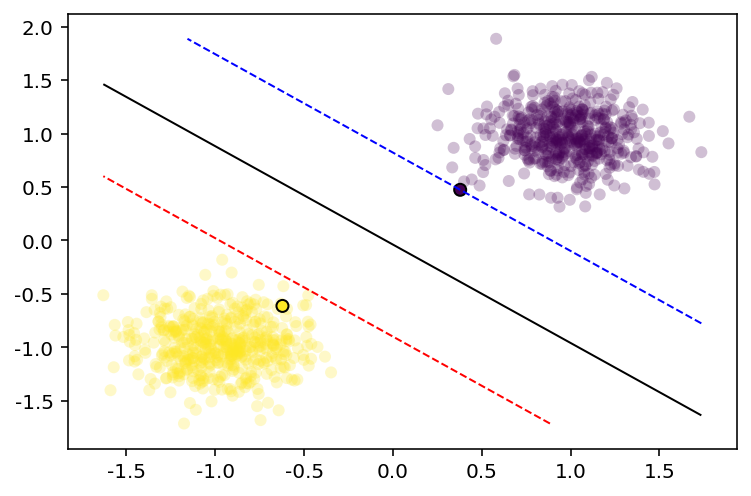

In [115]:
fig, ax = plt.subplots()
grid, ax = plot_decision_boundary(output, ax)

下面验证有离群点的情况

In [116]:
# Add an outlier
X_outlier = np.append(X_train_scaled, [0.1, 0.1])
X_outlier = X_outlier.reshape(X_train.shape[0]+1, X_train.shape[1])
y_outlier = np.append(y, 1)

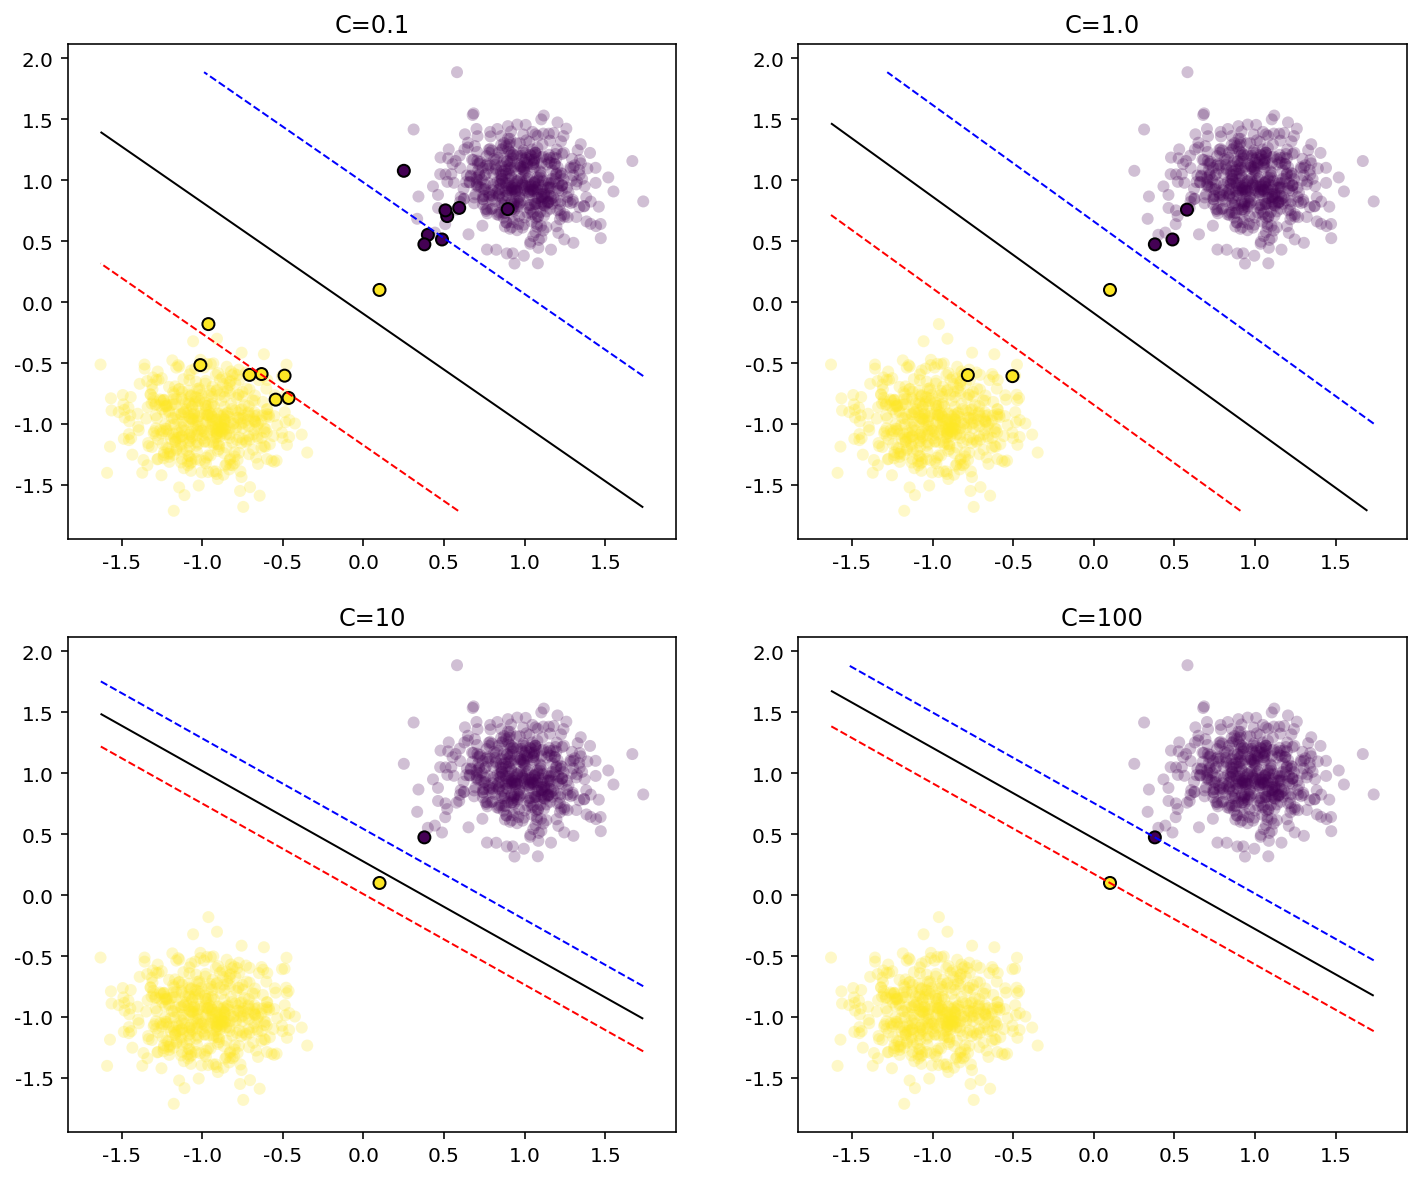

In [117]:
# Set model parameters and initial values
figure = plt.figure(figsize=(12, 10))
for i, C in enumerate([0.1, 1.0, 10, 100]):
    m = len(X_outlier)
    initial_alphas = np.zeros(m)
    initial_b = 0.0

    # Instantiate model
    model = SMOModel(X_outlier, y_outlier, C, linear_kernel,
                     initial_alphas, initial_b, np.zeros(m))

    # Initialize error cache
    initial_error = decision_function(model.alphas, model.y, model.kernel,
                                      model.X, model.X, model.b) - model.y
    model.errors = initial_error
    
    output = train(model)
    ax = plt.subplot(221+i)
    ax.set_title('C={}'.format(C))
    grid, ax = plot_decision_boundary(output, ax)

可以看到$C$越大，对误差容忍越小。

下面尝试高斯核

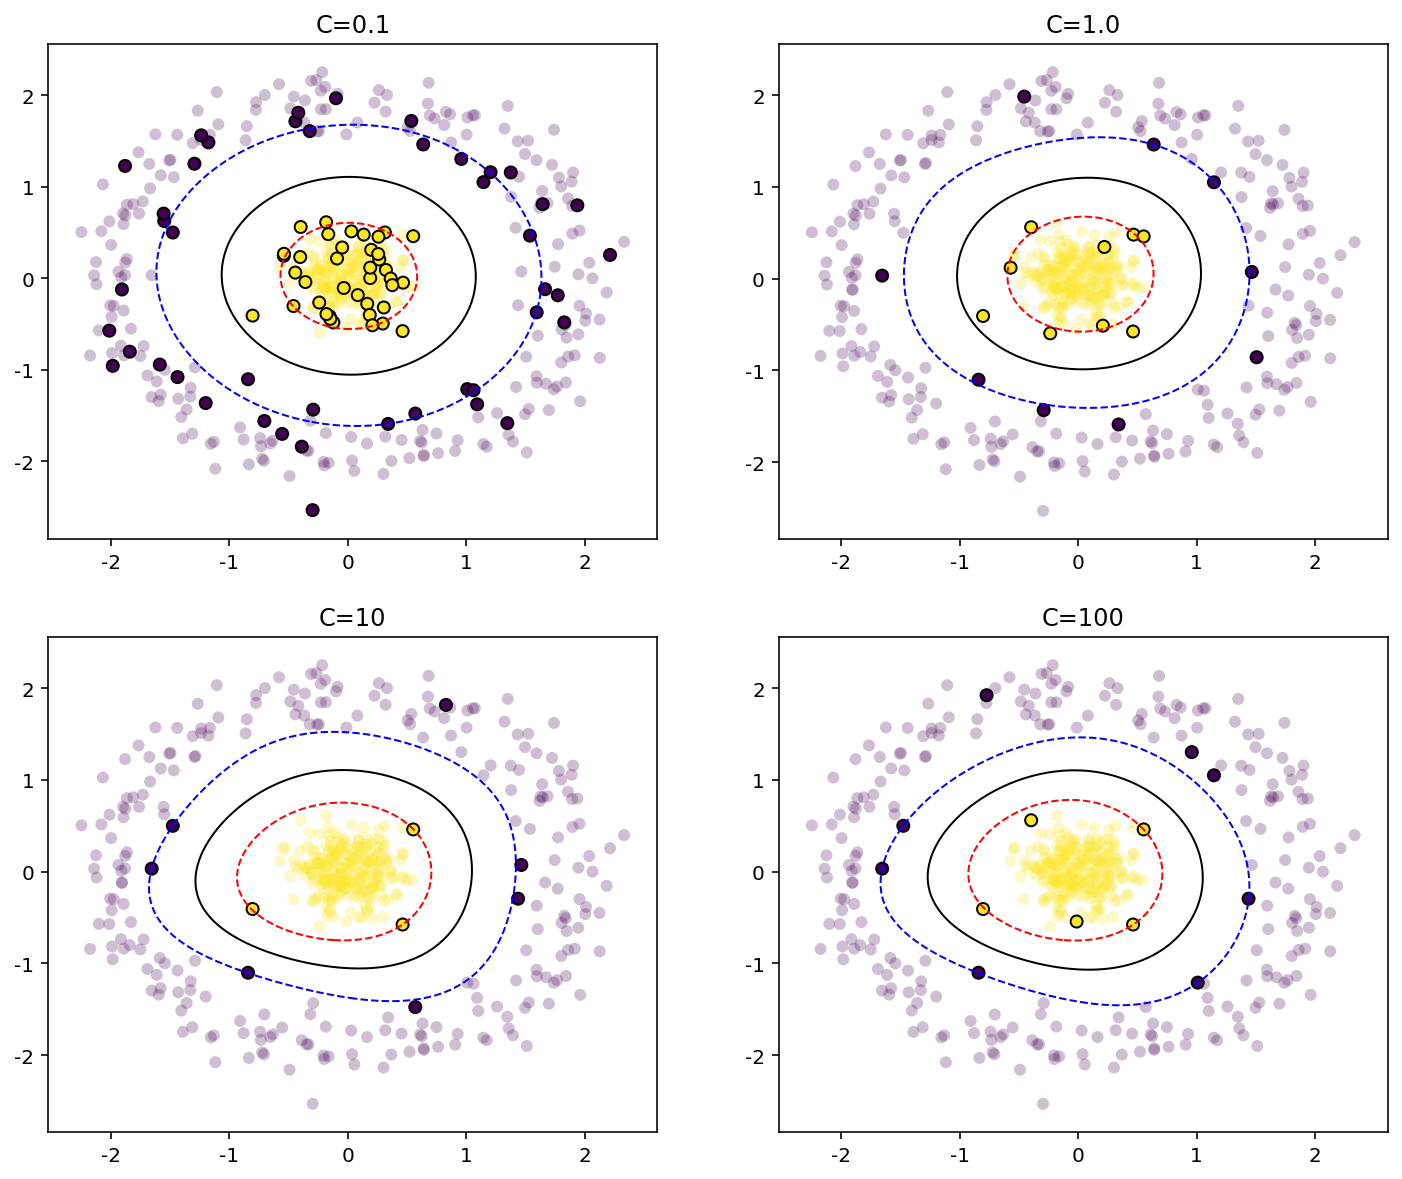

In [118]:
from sklearn.datasets import make_circles

X_train, y = make_circles(n_samples=500, noise=0.1,
                          factor=0.1,
                          random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y)
y[y == 0] = -1

figure = plt.figure(figsize=(12, 10))
for i, C in enumerate([0.1, 1.0, 10, 100]):
    # Set model parameters and initial values
    m = len(X_train_scaled)
    initial_alphas = np.zeros(m)
    initial_b = 0.0

    # Instantiate model
    model = SMOModel(X_train_scaled, y, C, gaussian_kernel,
                     initial_alphas, initial_b, np.zeros(m))

    # Initialize error cache
    initial_error = decision_function(model.alphas, model.y, model.kernel,
                                      model.X, model.X, model.b) - model.y
    model.errors = initial_error
    
    output = train(model)
    ax = plt.subplot(221+i)
    ax.set_title('C={}'.format(C))
    grid, ax = plot_decision_boundary(output, ax)

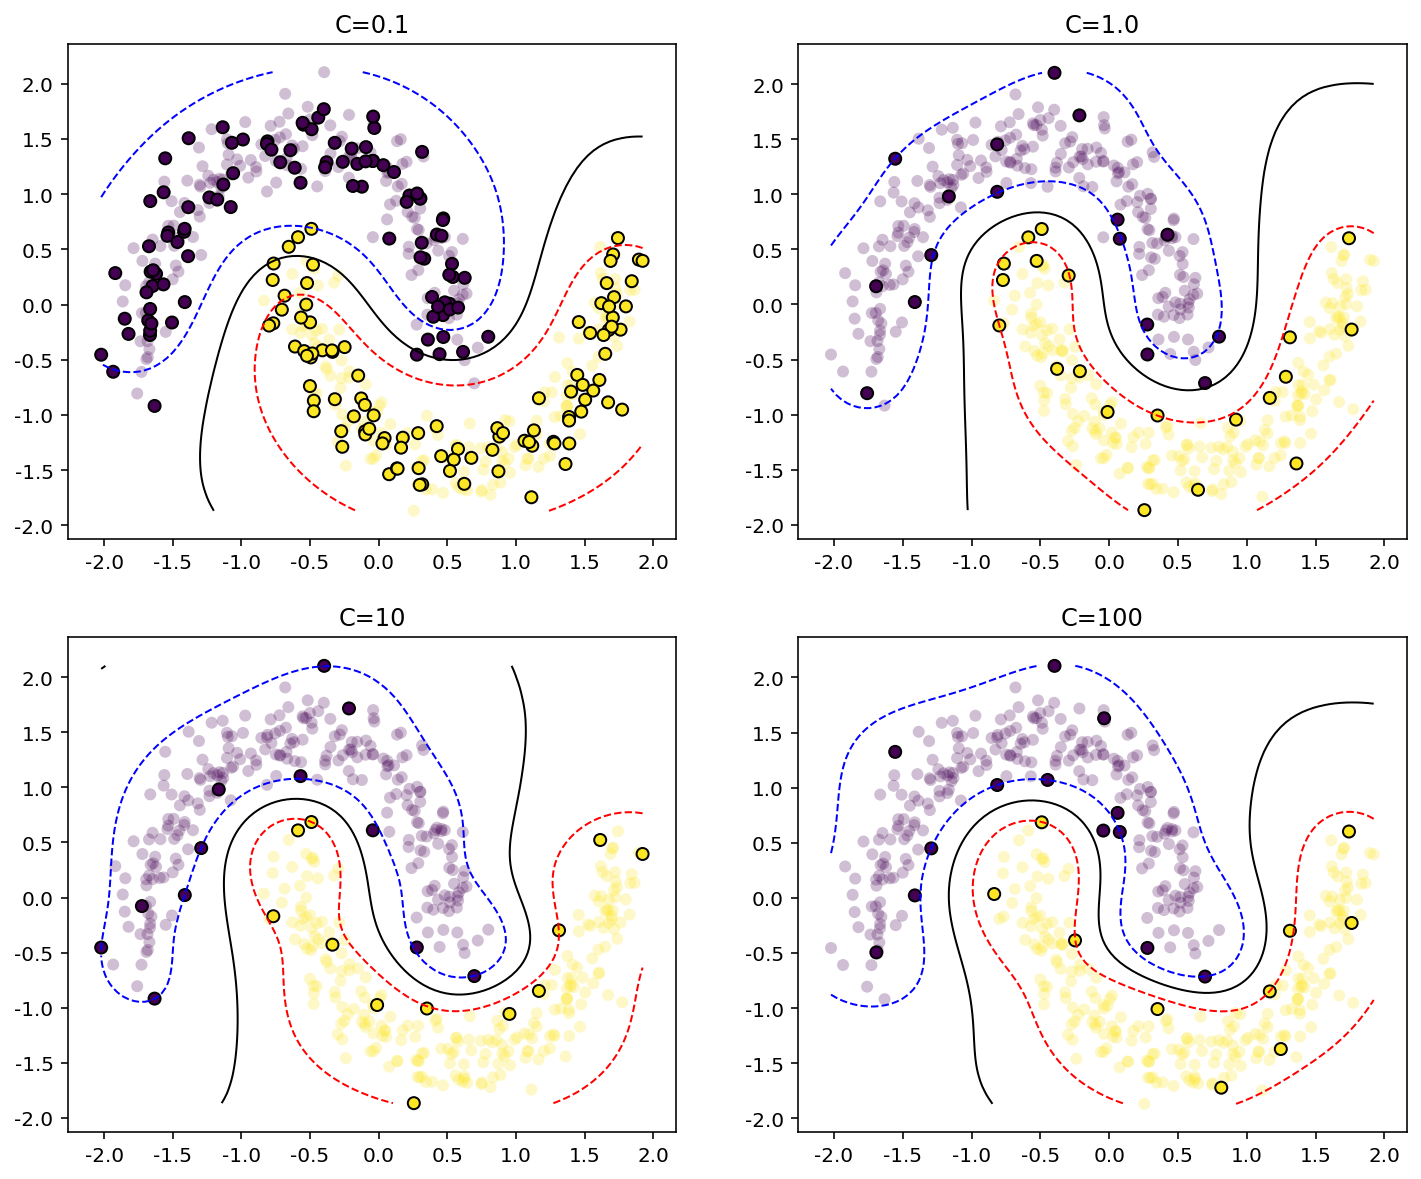

In [122]:
X_train, y = make_moons(n_samples=500, noise=0.1,
                        random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y)
y[y == 0] = -1
figure = plt.figure(figsize=(12, 10))

for i, C in enumerate([0.1, 1.0, 10, 100]):
    # Set model parameters and initial values
    m = len(X_train_scaled)
    initial_alphas = np.zeros(m)
    initial_b = 0.0

    # Instantiate model
    model = SMOModel(X_train_scaled, y, C, lambda x, y: gaussian_kernel(x, y, sigma=0.5),
                     initial_alphas, initial_b, np.zeros(m))

    # Initialize error cache
    initial_error = decision_function(model.alphas, model.y, model.kernel,
                                      model.X, model.X, model.b) - model.y
    model.errors = initial_error
    
    output = train(model)
    ax = plt.subplot(221+i)
    ax.set_title('C={}'.format(C))
    grid, ax = plot_decision_boundary(output, ax)    